# Assignment 3: Classical Hough Transform

## Ex. 3.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) OR circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

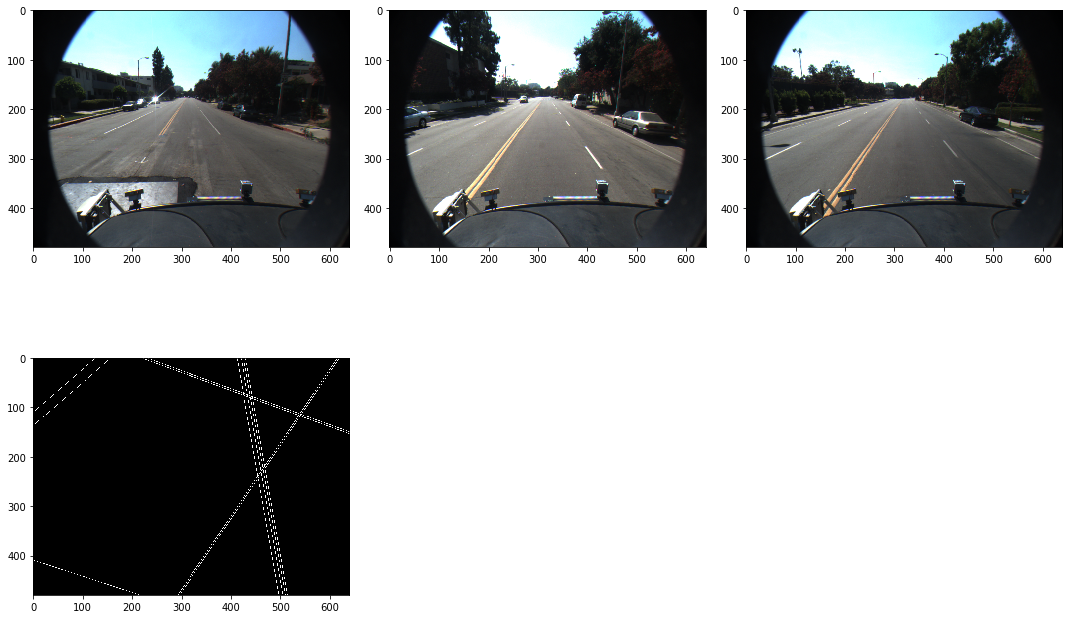

In [45]:
""" KOMMENTAR FÜR TIM
Wir printen 20 Linien statt 10, weil sonst komischer Kontrast.
Wir vermuten, dass die eine Gerade, die von unten 300 schräg nach rechts oben geht,
durch die Bäume kommt."""

%matplotlib inline 
import matplotlib.pyplot as plt
from skimage.draw import line
from skimage import io, data, feature, color
import numpy as np
import math

lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

#eye1 = io.imread('images/eye_tracking/0000.jpeg')
#eye2 = io.imread('images/eye_tracking/0050.jpeg')
#eye3 = io.imread('images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)

ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)

grey1 = color.rgb2grey(lane1)
grey2 = color.rgb2grey(lane2)
grey3 = color.rgb2grey(lane3)

edge1 = feature.canny(grey1)
edge2 = feature.canny(grey2)
edge3 = feature.canny(grey3)


def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina
    # compute start and end point of line 
    x0 = 0
    y0 = int(round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a))))
    x1 = dimx
    y1 = int(round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a))))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

def Hough(img):
    
    #akku erstellen
    diagonale = int(math.sqrt((img.shape[0])**2+(img.shape[1])**2))
    winkel_anzahl = 73
    accumulator = np.zeros((winkel_anzahl,diagonale))
    schon_besucht = np.zeros((winkel_anzahl,diagonale))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(img[x][y]):
                    
                for a in range(winkel_anzahl):
                    #TODO *2?
                    laenge_r = int(x*math.cos(a*5) + y*math.sin(a*5))
                    accumulator[a][laenge_r] +=1

    #TODO 100 strkste kanten extrahieren
    #Achter(accumulator, 20, 30)
    maxima = []
    for r in range(1,diagonale-1):
        for a in range(1,winkel_anzahl-1):
        
            achterTest = Achter(accumulator,a,r)
            
            if (achterTest[0] == (0,0)):
            
                maxima.append([[int(a*360/winkel_anzahl),int(r)],achterTest[1]])
            #else:

    ten = []
    while(len(ten) < 20):
        m = maxima[0]
        j=0
        for i in range(len(maxima)):
            if maxima[i][1] > m[1]:
                m = maxima[i]
                j=i
        ten.append(m)
        del maxima[j]
                
    #neues bild erstellen und kanten einzeichnen
    out_img = np.zeros((img.shape[0],img.shape[1]))

    for q in range(len(ten)):
        out_img = draw_line_hessian_normal(out_img,ten[q][0][0],ten[q][0][1])    
    
    
            
    io.imshow(out_img)
    
def Achter(accumulator, x, y):
    arr = [accumulator[x-1][y-1],accumulator[x][y-1],accumulator[x+1][y-1],accumulator[x-1][y],accumulator[x][y],accumulator[x+1][y],accumulator[x-1][y+1],accumulator[x][y+1],accumulator[x+1][y+1]]
    #der index des maximalen elements
    max_elem_index = (arr.index(max(arr)))
    return((((max_elem_index % 3) -1),(math.floor(max_elem_index/3))-1),arr[max_elem_index])


Hough(edge1)
#ax21.imshow(edge1)

#ax21.imshow(edge1)
#ax22.imshow(eye2)
#ax23.imshow(eye3)

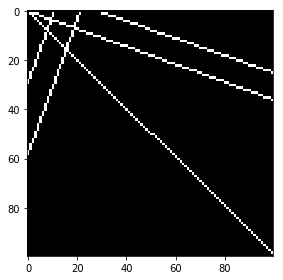

In [67]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 20, 20)
image = draw_line_hessian_normal(image, 20, 10)
image = draw_line_hessian_normal(image, 110, 0)
image = draw_line_hessian_normal(image, -70, 10)
image = draw_line_hessian_normal(image,135,0)

io.imshow(image)

## line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image
* display your result set (draw those lines on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

In [48]:
print("Siehe oben. :-)")

Siehe oben. :-)


## circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

# Ex. 3.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

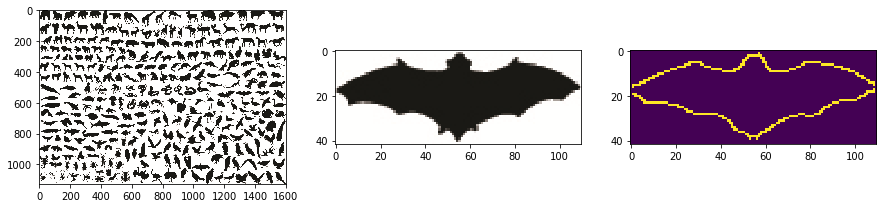

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**RESULT**)